In [51]:
from IPython.display import HTML

import numpy as np
import matplotlib.pyplot as plt
import math as m
import warnings
warnings.filterwarnings('ignore')
# . . Section for general function definitions
def label(s):
    plt.title(s,size=20);plt.xlabel('k',size=16); plt.ylabel('Amplitude',size=16)
    
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this Jupyter notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
''')

![title](data/TITLE.png)

### <h1><center>Module 10: Discrete Fourier Series and Discrete Fourier Transform</center></h1>

Now that we have covered the digital sampling theorem, we are better equipped to understand what is going on "under the hood" when we have been applying the (discrete or fast) Fourier Transform.  

You'll recall that when we looked at **continuous** functions:

1. The Fourier Series of a **periodic continuous** function has a **discrete** Fourier representation ($k\Delta \omega$);

2. The Fourier Transform of a **continuous** function has a **continuous** Fourier representation ($\omega$)

We'll now look at two examples of **discrete** sequences and observe that:

3. The **discrete** Fourier Series (DFS) of a **periodic discrete** sequence has a **periodic discrete** Fourier representation.

4. The **discrete** Fourier Transform (DFT) of a **discrete** sequences has a **discrete** Fourier representation.

We will start first with the DFS, which represents an extension of the continuous-time Fourier Series.  This will motivate our analysis of the DFT.  We will then look at the DFTs of a number of short filters.

# Discrete Fourier Series (DFS)

The **discrete Fourier Series** (DFS) is related to a **continuous Fourier Series** (CFS) in that it is a repetitive signal with a fixed interval of repetition.  However, whereas a time-series CFS has a periodicity of duration $T$ seconds, a DFS is a sequence of numbers with a periodicity every $N$ values. 

Let $\tilde{x}[n]$ be a **periodic sequence** with period $N$,

$$ \tilde{x}[n] = \tilde{x}[n+N], \tag{1a}$$

where $n=[\dots,-2,-1,0,1,2,\dots]$, and we use a tilde symbol to recognize that the time series is **periodic**. 
This function can thus describe an infinitely repeating sequence via the following:

$$ \tilde{x}[n] = \sum_{k=-\infty}^{\infty} x[n-Nk] \tag{1b}$$

where $x[n]$ represents a **single period** of the sequence with index ranging from 0 to N-1.  

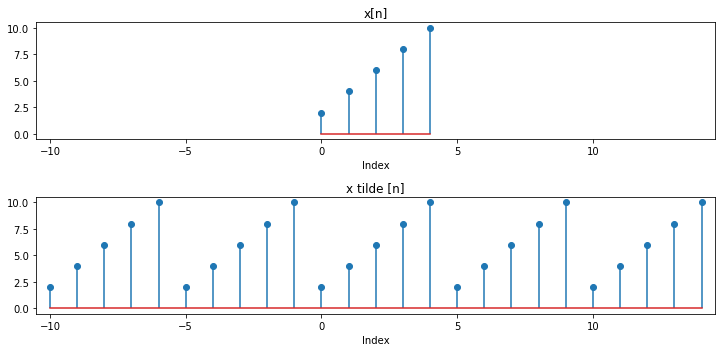

In [2]:
n = np.array(range(5))
xn = np.array([2,4,6,8,10])
ntilde = np.arange(-10,15)
xtilde = np.concatenate((xn,xn,xn,xn,xn),axis=0)

plt.figure(figsize=(10,5))
plt.subplot(211)
plt.stem(n,xn, use_line_collection=True)
plt.xlabel('Index')
plt.title('x[n]')
plt.xlim(-10.5,14.5)

plt.subplot(212)
plt.stem(ntilde,xtilde, use_line_collection=True)
plt.xlabel('Index')
plt.title('x tilde [n]')
plt.xlim(-10.5,14.5)

plt.tight_layout();plt.show()

**Figure 1. Illustration of the difference between the base sequence $x[n]$ (upper panel) and the periodic sequence $\tilde{x}[n]$ formed by an infinite number of repetitions of the base sequence.** 

Although strictly speaking $\tilde{x}[n]$ does not have a Fourier Transform because it is not absolutely summable (and therefore has an infinite amount of energy), it can be expressed in terms of a discrete Fourier series over a single period (i.e., from k=0 to N-1):

<div class="alert alert-info" role="alert">
$$ \tilde{x}[n] = \frac{1}{N} \sum_{k=0}^{N-1} \tilde{X}[k]e^{i2\pi k n/N}, \quad n=-\infty,\infty\tag{2}$$
</div>

where $n$ is the "time" variable and $k$ is the "frequency" variable. Note that the index on $\tilde{x}[n]$ ranges from $n=-\infty$ to $\infty$.

# The Inverse DFS Transform

To make the connection to what you have learned earlier in the course on the (continuous) Fourier Series, you might recall that the **reconstruction** of periodic function $x(t)$ was given by:

$$ x(t) = \sum_{k=-\infty}^{\infty} C_k {\rm e}^{i k \omega_0 t}. \tag{3}$$

In this case we are constructing the **periodic continuous** function $x(t)$ by summing over a potentially infinite number of coefficients $C_k$ weighted by the Fourier kerenel ${\rm e}^{i k \omega_0 t}$ where $t$ is a continuous variable. 

Let's start the connection between the discrete and regular Fourier Series by replacing the fundamental angular frequency in equation 3 with $\omega_0 = \frac{2\pi}{T}$ yields:

$$ x(t) = \sum_{k=-\infty}^{\infty} C_k {\rm e}^{i 2\pi k t/T}. \tag{4a}$$

The final substitutions are leading to equation 2 are: 

* (1) replacing $\frac{t}{T}\rightarrow\frac{n}{N}$; 
$$ x(t) = \sum_{k=-\infty}^{\infty} C_k {\rm e}^{i 2\pi k n/N}. \tag{4b}$$
* (2) recognizing that we only need to consider a single period (i.e., $0\le n\le N-1$) because our frequency domain response will be periodic with period $N$; 
$$ x(t) = \sum_{k=0}^{N-1} C_k {\rm e}^{i 2\pi k n/N}. \tag{4c}$$
* (3) replacing continuous function $x(t)$ with discrete sequence $\tilde{x}[n]$; and 
$$ \tilde{x}[n] = \sum_{k=0}^{N-1}  C_k {\rm e}^{i 2\pi k n/N}. \tag{4c}$$
* (4) exchanging our potentially infinite number of discrete $C_k$ coefficients (which have an implicit $\frac{1}{T}$ weighting) with a similarly discrete $N$-point sequence $\tilde{X}[n]$ (that has an explicit $\frac{1}{N}$ weighting).  $$ \tilde{x}[n] = \frac{1}{N}\sum_{k=0}^{N-1}  \tilde{X}[k]{\rm e}^{i 2\pi k n/N}. \tag{5}$$


The last point is a consequence of only needing to represent the signal at discrete frequencies up to the Nyquist frequency (unlike a continuous signal that requires summation over an infinite number of coefficients for an exact represention).  Essentially, this is a decomposition of $\tilde{x}[n]$ into a sum of $N$ harmonically related exponentials weighted by their Fourier coefficients $\tilde{X}[k]$.  

# The Forward DFS Transform

To specify the forward DFS transform, one may multiply both sides of equation 5 by 
$e^{-i2\pi l n/N}$ and sum over a full period:

$$ \tilde{x}[n] e^{-i2\pi l n/N} = \frac{1}{N} \sum_{k=0}^{N-1} \tilde{X}[k]e^{i2\pi (k-l) n/N}. \tag{6} $$

We can use the fact that complex exponentials are orthogonal 

$$\sum_{n=0}^{N-1} e^{i2\pi (k-l) n/N}
=
N \delta[k-l]
=
\left\{
\begin{array}{c}
N, \quad k=l \\
0, \quad k\ne l
\end{array}
\right.
\tag{7a}
$$

to simplify this expression. 

<div class="alert alert-success" role="alert">

**Complex Exponential Orthogonality**: 

To demonstrate this let's examine the case where $N=4$:

$$
\sum_{n=0}^{N-1} e^{i2\pi (k-l) n/N}
= 
\sum_{n=0}^{3} e^{i2\pi (k-l) n/4}
=
e^{0}+e^{i\pi (k-l) /2}+e^{i\pi (k-l)}+e^{i3\pi (k-l)/2}
=
1+e^{i\pi (k-l)/2}+e^{i\pi (k-l)}+e^{i3\pi (k-l)/2} \tag{7b}
$$

Now if $k=l$ then the following is true:

$$\sum_{n=0}^{3} e^{i2\pi (k-l) n/4}=\left.1+e^{i\pi (k-l)/2}+e^{i\pi (k-l)}+e^{i3\pi (k-l)/2}\right|_{k=l} = 1 + 1 + 1 + 1=4=N \tag{7c}$$

Now if, say, $k=l+1$ then the following is true:

$$\sum_{n=0}^{3} e^{i2\pi (k-l) n/4}=\left.1+e^{i\pi (k-l)/2}+e^{i\pi (k-l)}+e^{i3\pi (k-l)/2}\right|_{k=l+1} = 1+e^{i\pi/2}+e^{i\pi}+e^{i3\pi/2}=1+i-1-i=0. \tag{7d}$$

One can show this to be generally true for any value of $N$ and $k\neq l$.
</div>

Let's now sum equation 6 from $n=0$ to $n=N-1$ to extract $\tilde{X}[k]$ at for every $k$ value.

$$ 
\begin{eqnarray}
\sum_{n=0}^{N-1} \tilde{x}[n] e^{-i2\pi l n/N} 
&=& \frac{1}{N} \sum_{n=0}^{N-1} \sum_{k=0}^{N-1} \tilde{X}[k]e^{i2\pi (k-l) n/N} \tag{8a}\\
&=& \frac{1}{N} \sum_{k=0}^{N-1} \tilde{X}[k] \left(\sum_{n=0}^{N-1}  e^{i2\pi (k-l) n/N}\right) \tag{8c}\\
&=& \frac{1}{N} \sum_{k=0}^{N-1} \tilde{X}[k] N \delta[k-l] \tag{8d} \\
&=&  \tilde{X}[l]. \tag{8e} 
\end{eqnarray}
$$

Switching back from dummy index $l$ to $k$ on the left hand side of equation 8a and the right hand side of equation 8e, the above result shows that the Fourier coefficients of the DFS transform are given by:

<div class="alert alert-info" role="alert">
$$
\tilde{X}[k] = \sum_{n=0}^{N-1} \tilde{x}[n] e^{-i2\pi k n/N}, \quad k=-\infty,\infty \tag{9}
$$
</div>

where the index of $\tilde{X}[k]$ runs from $k=-\infty$ to $k=\infty$ since this is an infinitely repeating sequence.  Note that the DFS coefficients are similarly periodic with period N:

$$\tilde{X}[k]=\tilde{X}[k+N], \quad k\in I. \tag{10} $$

Based on the equations above we write

$$\tilde{x}[n] \overset{DFS}{\Longleftrightarrow}\tilde{X}[k] \tag{11}$$

to illustrate the duality of the discrete Fourier Series.

## Example 1

**Q:** Let us find a discrete Fourier series representation for the periodic sequence

$$ \tilde{x}[n] = \sum_{k=-\infty}^{\infty} x[n-10k],\quad n=-\infty,\infty \tag{12}$$

where our base sequence $x[n]$ is given by:

$$ x[n] = 
\left\{
\begin{array}{cc}
1, & 0 \le n < 5 \\
0, & 5 \le n < 10 \\
\end{array}
\right. .
\tag{13}
$$

**A:** Note that $\tilde{x}[n]$ is periodic with a period $N=10$.  Therefore, the DFS coefficient are given by equation 2 above:

$$
\tilde{X}[k] = \sum_{n=0}^{9} \tilde{x}[n] e^{-i2\pi k n/10}  = \sum_{n=0}^{9} \tilde{x}[n] e^{-i\pi k n/5} \tag{14} 
$$

Substituting in $x[n]$ for $\tilde{x}[n]$ (because they are equivalent over the full period N  between n=0 and n=9) yields:

$$
\tilde{X}[k] = \sum_{n=0}^{9} x[n] e^{-i\pi k n/5} = \sum_{n=0}^{4} e^{-i\pi k n/5}  \tag{15}
$$

where we use the fact that $x[n]=1$ between $n=0$ and $n=4$ and is zero otherwise.  Recognizing that we can pull out a power of $^n$, we can write:

$$
\tilde{X}[k] = \sum_{n=0}^{4} \left(e^{-i\pi k/5}\right)^n, \tag{16}
$$

which is a [geometric series](https://en.wikipedia.org/wiki/Geometric_series) where $r=e^{-i\pi k/5}$.  A geometric series has the following sum (where $r\neq 1$):

$$S_n = \sum_{n=0}^{N-1} r^n = \frac{1-r^N}{1-r}, \tag{17}$$

which allows us to write

$$
\tilde{X}[k] = \sum_{n=0}^{4} \left(e^{-i\pi k/5}\right)^n = \frac{1-e^{-i\pi k}}{1-e^{-i\pi k/5}} 
=
\left\{
\begin{array}{cc}
5 & k=0\\
\frac{2}{1-e^{-i\pi k/5}} & k\,\mathrm{odd} \\
0 & k\,\mathrm{even} \\
\end{array}
\right., \quad k=-\infty,\infty \tag{18}
$$

The values for $k=0$ (or $kN$) can be found by inspecting the middle term, which in this case turns out to be the summation over $x[n]$ coefficients (i.e., 5 ones).  The DFS for all other values of $k$ may be found according to equation 3 above.  Here are the coefficients, as well as a graphical representation of their real and imaginary components.

Let's look at the answer graphically for a single period:

[5.00000000e+00+0.j         1.00000000e+00-3.07768354j
 2.22044605e-16+0.j         1.00000000e+00-0.72654253j
 2.22044605e-16+0.j         1.00000000e+00+0.j
 2.22044605e-16+0.j         1.00000000e+00+0.72654253j
 2.22044605e-16+0.j         1.00000000e+00+3.07768354j]


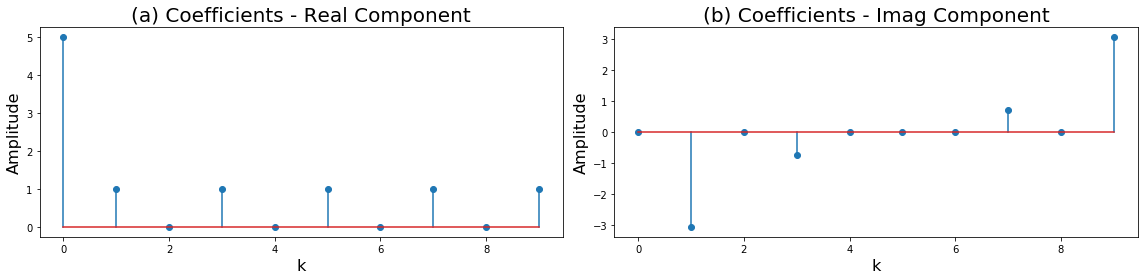

In [3]:
# . . Define 10 element array and take fft
x=np.array([1,1,1,1,1,0,0,0,0,0])
X = np.fft.fft(x);print(X)

plt.figure(figsize=(16, 4))
plt.subplot(121);plt.stem(np.arange(0,10,1),X.real);label('(a) Coefficients - Real Component')
plt.subplot(122);plt.stem(np.arange(0,10,1),X.imag);label('(b) Coefficients - Imag Component')
plt.tight_layout(); plt.show()

**Figure 1. The real (a) and imaginary (b) coefficients of the discrete Fourier series in equation 18.**

# Simplifying Notation

In order to simplify notation one often sees the $W_N$ notation that uses the following definition:

<div class="alert alert-info" role="alert">
$$W_N = e^{-i2\pi/N}. \tag{19}$$
</div>

Thus, we can write:

$$\left(W_N\right)^{kn} = W_N^{kn} = e^{-i2\pi kn/N} \tag{20}$$

<div class="alert alert-info" role="alert">
Using this notation the forward and inverse DFS operations may be written:

$$
\tilde{X}[k]= \sum_{n=0}^{N-1} \tilde{x}[n] e^{-i2\pi nk/N} = \sum_{n=0}^{N-1} \tilde{x}[n] W_N^{nk} \tag{21}
$$

and

$$
 \tilde{x}[n] = \frac{1}{N}\sum_{n=0}^{N-1} \tilde{X}[k]  e^{i2\pi nk/N} = \frac{1}{N}\sum_{n=0}^{N-1} \tilde{X}[k]  W_N^{-nk}, \tag{22}
$$

respectively.
</div>

### Exercises

If $W_N = e^{-i2\pi/N}$, what do the following equal?

* $W_4^{0}$

$W_4^{0} = e^{-i2\pi 0/N}=e^{-i2\pi 0/4}=e^{-i 0}=1$. 

* $W_4^{2}$

$W_4^{2} = e^{-i2\pi 2/N}=e^{-i2\pi 2/4}=e^{-i\pi }=-1$

* $W_4^{4p}$ where $p$ is integer.


$W_4^{4p} = e^{-i2\pi 4p/N}=e^{-i2\pi 4p /4}=e^{-i 2\pi p}=1$ for all p integers.


* $W_4^{4p+2}$ where $p$ is integer.


$W_4^{4p+2} = e^{-i2\pi (4p+2)/N}=e^{-i2\pi (4p+2) /4}=e^{-i 2\pi p - i2\pi/2}=-e^{i 2\pi p}=-1$ for all p integers.



# Example 2

**Q:** Find the DFS expansion of the sequence

$$\tilde{x}[n] = A \,\mathrm{cos}\left(\frac{n\pi}{2}\right), \quad n=-\infty,\infty. \tag{23}$$

**A:** Because $\tilde{x}[n]$ is periodic with $N=4$ (i.e., $\tilde{x}[n]=[A,0,-A,0]$) , the DFS coefficients may be found by evaluating the sum

$$
\tilde{X}[k] = \sum_{n=0}^{3} \tilde{x}[n] W_4^{nk}, \quad k=-\infty,\infty \tag{24}
$$

Let's look at the different $n$ values subsituting in the values of $\tilde{x}[n]$

$$
\begin{eqnarray}
\tilde{X}[0] &=& A W_4^{0*0} -  A W_4^{2*0} &=& A W_4^{0} -  A W_4^{0} & = 0  \\
\tilde{X}[1] &=& A W_4^{0*1} -  A W_4^{2*1} &=& A W_4^{0} -  A W_4^{2} & = 2A \\
\tilde{X}[2] &=& A W_4^{0*2} -  A W_4^{2*2} &=& A W_4^{0} -  A W_4^{4} & = 0  \\
\tilde{X}[3] &=& A W_4^{0*3} -  A W_4^{2*3} &=& A W_4^{0} -  A W_4^{6} & = 2A \\
\end{eqnarray}
\tag{25}
$$

where we have used $W_4^{0} = e^{i2\pi 0/N}=1$ and $W_4^{2} = e^{i \pi}=- 1$, as well as
for any integer $p$: $W_4^{4p} =  e^{i2\pi}=1$ and $W_4^{4p+2} =  e^{i\pi}=-1$.  Here is a print out of the coefficients, as well as stem graphs of the real and imaginary components.

Let's look at these graphically for a single period assuming $A=1$:

[0.+0.j 2.+0.j 0.+0.j 2.+0.j]


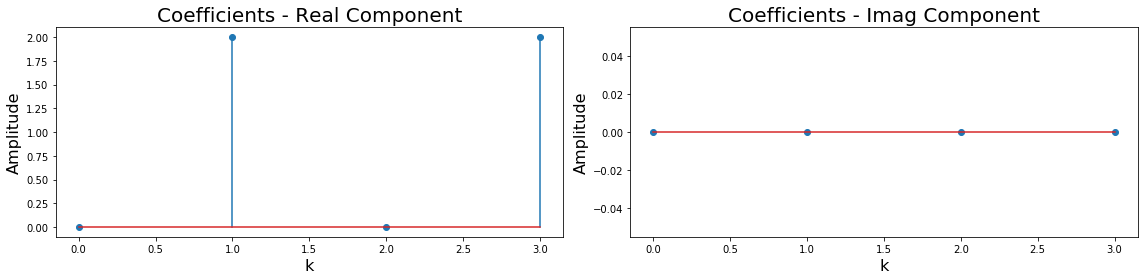

In [4]:
# . . Example with A=1
x1=np.array([1,0,-1,0])
X1 = np.fft.fft(x1);print(X1)

plt.figure(figsize=(16, 4))
plt.subplot(121);plt.stem(X1.real);label('Coefficients - Real Component')
plt.subplot(122);plt.stem(X1.imag);label('Coefficients - Imag Component')
plt.tight_layout(); plt.show()

**Figure 2. The real (a) and imaginary (b) coefficients of the discrete Fourier series in equation 25 assuming $A=1$.**


# Matrix Notation

By inspecting the above example, you might notice that the operations can be written in using **matrix notation** (i.e., $\left[W_N^{nk}\right]$).  Let's do just that here:

$$
\begin{eqnarray}
\left(
\begin{array}{c}
\tilde{X}[0] \\
\tilde{X}[1]\\
\tilde{X}[2]\\
\tilde{X}[3]\\
\end{array}
\right)
&=&
\left(
\begin{array}{c}
W_4^{0*0} & W_4^{1*0} & W_4^{2*0} & W_4^{3*0}\\
W_4^{0*1} & W_4^{1*1} & W_4^{2*1} & W_4^{3*1}\\
W_4^{0*2} & W_4^{1*2} & W_4^{2*2} & W_4^{3*2}\\
W_4^{0*3} & W_4^{1*3} & W_4^{2*3} & W_4^{3*3}\\
\end{array}
\right)
\left(
\begin{array}{c}
\tilde{x}[0] \\
\tilde{x}[1] \\
\tilde{x}[2] \\
\tilde{x}[3] \\
\end{array}
\right) 
=
\left(
\begin{array}{c}
W_4^{0} & W_4^{0} & W_4^{0} & W_4^{0}\\
W_4^{0} & W_4^{1} & W_4^{2} & W_4^{3}\\
W_4^{0} & W_4^{2} & W_4^{4} & W_4^{6}\\
W_4^{0} & W_4^{3} & W_4^{6} & W_4^{9}\\
\end{array}
\right)
\left(
\begin{array}{c}
\tilde{x}[0] \\
\tilde{x}[1] \\
\tilde{x}[2] \\
\tilde{x}[3] \\
\end{array}
\right) 
\\
\,
&
=
&
\left(
\begin{array}{cccc}
 1 & 1 & 1 & 1 \\
 1 & e^{\frac{-i \pi }{2}} & e^{-i \pi } & e^{\frac{-3 i \pi }{2}} \\
 1 & e^{-i \pi } & e^{-2 i \pi } & e^{-3 i \pi } \\
 1 & e^{\frac{-3 i \pi }{2}} & e^{-3 i \pi } & e^{\frac{-9 i \pi }{2}} \\
\end{array}
\right)
\left(
\begin{array}{c}
\tilde{x}[0] \\
\tilde{x}[1] \\
\tilde{x}[2] \\
\tilde{x}[3] \\
\end{array}
\right) 
=
\left(
\begin{array}{cccc}
 1 & 1 & 1 & 1 \\
 1 & -i & -1 & i \\
 1 & -1 & 1 & -1 \\
 1 & i & -1 & -i \\
\end{array}
\right)
\left(
\begin{array}{c}
\tilde{x}[0] \\
\tilde{x}[1] \\
\tilde{x}[2] \\
\tilde{x}[3] \\
\end{array}
\right). \\
\end{eqnarray}\tag{26}
$$

Inserting the input values $[A,0,-A,0]$ yields:

$$
\left(
\begin{array}{c}
\tilde{X}[0] \\
\tilde{X}[1]\\
\tilde{X}[2]\\
\tilde{X}[3]\\
\end{array}
\right)
=
\left(
\begin{array}{cccc}
 1 & 1 & 1 & 1 \\
 1 & i & -1 & -i \\
 1 & -1 & 1 & -1 \\
 1 & -i & -1 & i \\
\end{array}
\right)
\left(
\begin{array}{c}
A \\
0 \\
-A \\
0 \\
\end{array}
\right) 
=
\left(
\begin{array}{c}
0 \\
2A \\
0 \\
2A \\
\end{array}
\right),\tag{27}
$$

which yields the same answer as above.  The matrix $\left[W_N^{kn}\right]$ is known as the **Fourier Matrix**.

<!--
**Q1:** What is the Fourier Matrix $\left[W_6^{kn}\right]$?

$$
\left(W_6^{kn}\right)
=
\left(
\begin{array}{cccccc}
 1 & 1 & 1 & 1 & 1 & 1 \\
 1 & e^{\frac{i \pi }{3}} & e^{\frac{2 i \pi }{3}} & -1 & e^{-\frac{1}{3} (2 i \pi )} & e^{-\frac{1}{3} (i \pi )} \\
 1 & e^{\frac{2 i \pi }{3}} & e^{-\frac{1}{3} (2 i \pi )} & 1 & e^{\frac{2 i \pi }{3}} & e^{-\frac{1}{3} (2 i \pi )} \\
 1 & -1 & 1 & -1 & 1 & -1 \\
 1 & e^{-\frac{1}{3} (2 i \pi )} & e^{\frac{2 i \pi }{3}} & 1 & e^{-\frac{1}{3} (2 i \pi )} & e^{\frac{2 i \pi }{3}} \\
 1 & e^{-\frac{1}{3} (i \pi )} & e^{-\frac{1}{3} (2 i \pi )} & -1 & e^{\frac{2 i \pi }{3}} & e^{\frac{i \pi }{3}} \\
\end{array}
\right)
$$
-->

**Q2**: What is the Fourier Matrix $\left[W_8^{kn}\right]$?

**A**: The Fourier Matrix $\left[W_8^{kn}\right]$ is given by:

$$
\left(W_8^{kn}\right)
=
\left(
\begin{array}{cccccccc}
 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
 1 & e^{-i \pi/4} & -i & e^{- 3 i \pi/4} & -1 & e^{3 i \pi/4 } & i & e^{i \pi/4  } \\
 1 & -i & -1 & i & 1 & -i & -1 & i \\
 1 & e^{-3 i \pi/4} & i & e^{-i \pi/4} & -1 & e^{i \pi/4} & -i & e^{3 i \pi/4} \\
 1 & -1 & 1 & -1 & 1 & -1 & 1 & -1 \\
 1 & e^{3 i \pi/4} & -i & e^{i \pi/4} & -1 & e^{-i \pi /4} & i & e^{-3 i \pi/4} \\
 1 & i & -1 & -i & 1 & i & -1 & -i \\
 1 & e^{i \pi/4} & i & e^{3 i \pi/4} & -1 & e^{-3 i \pi /4} & -i & e^{-i \pi/4} \\
\end{array}
\right)
$$


# Properties of the DFS

## Linearity 

If $a$ and $b$ are real numbers then:

$$a\tilde{x_1}[n]+b\tilde{x_2}[n]\overset{DFS}{\Longleftrightarrow}a\tilde{X_1}[k]+b\tilde{X_1}[k] \tag{28}$$

## Shift

If a period sequence $\tilde{x}[n]$ is shifted, the DFS coefficients are multiplied by a complex exponential.  If $\tilde{x}[n]\overset{DFS}{\Longleftrightarrow}\tilde{X}[k]$, then for $\tilde{y}[n] = \tilde{x}[n-n_0]$ we get

$$ \tilde{Y}[n] = W_N^{-kn_0} \tilde{X}[n]. \tag{29}$$

Similarly if $\tilde{y}[n] = W_N^{nk_0} \tilde{x}[n]$ then

$$ \tilde{Y}[k] = \tilde{X}[k+k_0]. \tag{30}$$

## Periodic Convolution

If $\tilde{h}[n]$ and $\tilde{x}[n]$ are periodic with period $N$ and DFS coefficients $\tilde{H}[k]$ and $\tilde{X}[k]$, respectively, the sequence 

$$ \tilde{Y}[k]=\tilde{H}[k]\tilde{X}[k] \tag{31}$$

is formed by **periodically convolving** $\tilde{h}[n]$ with $\tilde{x}[n]$

$$\tilde{y}[n] = \sum_{k=0}^{N-1} \tilde{h}[n]\tilde{x}[n-k],\tag{32}$$

which is sometime written notationally as:

$$\tilde{y}[n] = \tilde{h}[n]\otimes \tilde{x}[n] \tag{33}$$

The only difference between **periodic convolution** and **linear convolution** is that you only apply the sum over a full period $N$.

# The Discrete Fourier Transform (DFT)

The discrete Fourier Transform (DFT) can easily be developed from the discrete Fourier series (DFS) representation for periodic sequences.  Let $x[n]$ be a finite-length sequence of length $N$ that is equal to zero outside the interval $[0,N-1]$.  A periodic sequence $\tilde{x}[n]$ may be formed from $x[n]$ as follows:

$$\tilde{x}[n] = \sum_{k=-\infty}^{\infty} x[n+kN], \quad n=-\infty,\infty \tag{34}$$

From the inverse DFS representation for $\tilde{x}[n]$, 

$$ \tilde{x}[n] = \frac{1}{N} \sum_{k=0}^{N-1} \tilde{X}[k]e^{i2\pi k n/N}, \quad n=-\infty,\infty \tag{35}$$

we can enforce the following restriction within the range $0\le n < N$. This gives us our representation of the DFT:

<div class="alert alert-info" role="alert">
$$ x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k]e^{i2\pi k n/N},\quad 0\le n < N. \tag{36}$$
</div>

Note that it is only by enforcing the range $0\le n < N$ that the DFT is differentiated from the DFS.  Similarly, for the forward DFT representation we can write:

<div class="alert alert-info" role="alert">
$$ X[k] = \sum_{n=0}^{N-1} x[n]e^{-i2\pi k n/N},\quad 0\le k < N. \tag{37}$$
</div>

We again recognize the duality with the following notation:

$$x[n] \overset{DFT}{\Longleftrightarrow}X[k]. \tag{38}$$

## Example 3

**(Q1)**  Compute the $N$-point DFT of

$$x_1[n] = \delta[n] \quad \mathrm{where} \quad 0\le n < N \tag{39}$$

**A:** The DFT of the unit sample can be easily evaluated from the definition of the DFT:

$$X_1[k] = \sum_{n=0}^{N-1} \delta[n] W_N^{nk} = W_N^{0k} = e^{i2\pi 0k/N} = 1, \quad 0\le k < N \tag{40}$$

Note that this similar to the continuous Fourier Transform.  The coefficient and stem plots of the real and imaginary components assuming $N=10$ are shown below:

[1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.-0.j 1.-0.j 1.-0.j 1.-0.j]


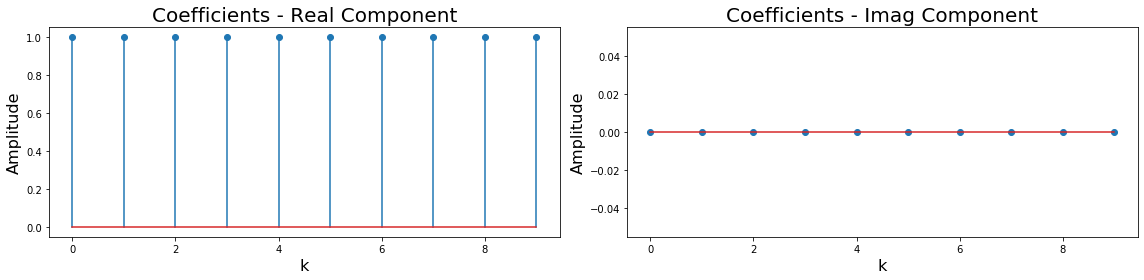

In [5]:
# . . Example with N=10
N=10
x3a=np.zeros(N); x3a[0]=1;
X3a = np.fft.fft(x3a); print(X3a)
 
plt.figure(figsize=(16, 4))
plt.subplot(121);plt.stem(X3a.real);label('Coefficients - Real Component')
plt.subplot(122);plt.stem(X3a.imag);label('Coefficients - Imag Component')
plt.tight_layout(); plt.show()

**Figure 3. The real (a) and imaginary (b) coefficients of the discrete Fourier series in equation 40.**


**(Q2)** Compute the $N$-point DFT of

$$x_2[n] = \delta[n-n_0], \quad \mathrm{where} \quad 0\le n < N \tag{41}$$

**A:** Similarly to the first example:

$$X_2[k] = \sum_{n=0}^{N-1} \delta[n-n_0] W_N^{nk} = W_N^{n_0k} = e^{-i2\pi n_0 k/N} , \quad 0\le k <N \tag{42}$$

The coefficient and stem plots of the real and imaginary components assuming $N=10$ and $n_0=2$ are shown below which very much look like the outline of a $\cos$ function!:

[ 1.        +0.j          0.30901699-0.95105652j -0.80901699-0.58778525j
 -0.80901699+0.58778525j  0.30901699+0.95105652j  1.        +0.j
  0.30901699-0.95105652j -0.80901699-0.58778525j -0.80901699+0.58778525j
  0.30901699+0.95105652j]


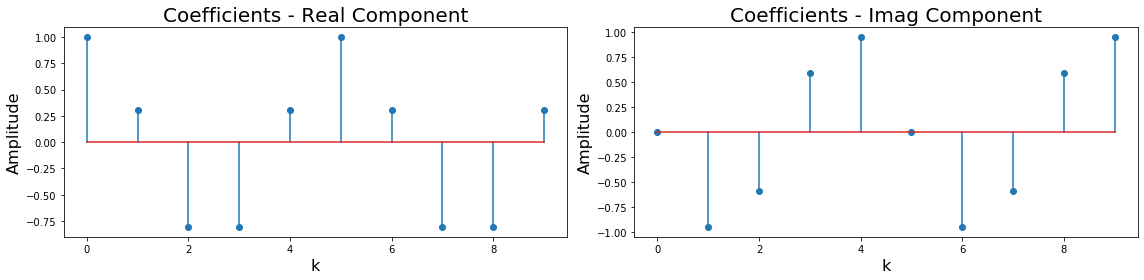

In [6]:
# . . Example with N=10 and n_0=2
N,n0=10,2
x3b=np.zeros(N);       x3b[n0]=1;
X3b = np.fft.fft(x3b); print(X3b)
 
plt.figure(figsize=(16, 4))
plt.subplot(121);plt.stem(X3b.real);label('Coefficients - Real Component')
plt.subplot(122);plt.stem(X3b.imag);label('Coefficients - Imag Component')
plt.tight_layout(); plt.show()

**Figure 4. The real (a) and imaginary (b) coefficients of the discrete Fourier series in equation 42.**


**(Q3)** Compute the $N$-point DFT of

$$x_3[n] = \alpha^n, \quad 0\le n < N \tag{43}$$

**A:** The DFT is as follows:

$$X_3[k] = \sum_{n=0}^{N-1} x[n] W_N^{nk} =\sum_{n=0}^{N-1} \alpha^n W_N^{nk}=\sum_{n=0}^{N-1} \left(\alpha W_N^{k}\right)^n , \quad \quad 0\le k < N \tag{44}$$

 Again, using the geometric sum:

$$X_3[k] = \frac{1- \left(\alpha W_N^{k}\right)^N}{1-\alpha W_N^{k}}, \quad 0\le k < N \tag{45}$$

The coefficient and stem plots of the real and imaginary components for $n=10$ and $\alpha=0.8$ are shown below.

[4.46312909+0.j         0.91125877-1.21461476j 0.5865682 -0.59284759j
 0.52158961-0.31818845j 0.50106726-0.1430391j  0.49590323+0.j
 0.50106726+0.1430391j  0.52158961+0.31818845j 0.5865682 +0.59284759j
 0.91125877+1.21461476j]


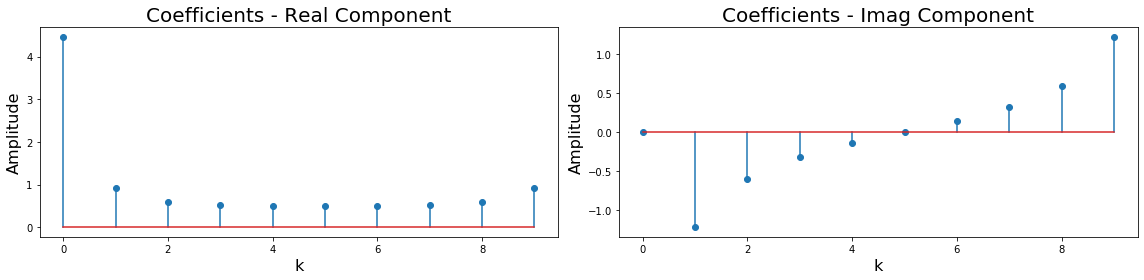

In [7]:
# . . Example with N=10 and a=0.8
N,a=10,0.8
n = np.array(np.arange(0,N,1));
x3c = a**n; 
X3c = np.fft.fft(x3c);print(X3c)

plt.figure(figsize=(16, 4))
plt.subplot(121);plt.stem(X3c.real);label('Coefficients - Real Component')
plt.subplot(122);plt.stem(X3c.imag);label('Coefficients - Imag Component')
plt.tight_layout(); plt.show()

**Figure 5. The real (a) and imaginary (b) coefficients of the discrete Fourier series in equation 45 using $n=10$ adn $\alpha=0.8$.**


**(Q4)** Compute the $N$-point DFT of

$$x_4[n] = u[n] - u[n-n_0], \quad 0\le n < N \tag{46}$$

**A:** The DFT may be calculated directly

$$X_4[k] = \sum_{n=0}^{N-1} x[n] W_N^{nk} = \sum_{n=0}^{n_0-1} W_N^{nk} = \frac{1- \left(W_N^{k}\right)^{n_0}}{1-W_N^{k}} = \frac{1- W_N^{k n_0}}{1-W_N^{k}} , \quad 0\le k < N, \tag{47}$$

where we have used $r=W_N^{k}$. The coefficient and stem plots of the real and imaginary components are shown below for $N=10$ and $n_0=5$.

[5.00000000e+00+0.j         1.00000000e+00-3.07768354j
 2.22044605e-16+0.j         1.00000000e+00-0.72654253j
 2.22044605e-16-0.j         1.00000000e+00+0.j
 2.22044605e-16+0.j         1.00000000e+00+0.72654253j
 2.22044605e-16-0.j         1.00000000e+00+3.07768354j]


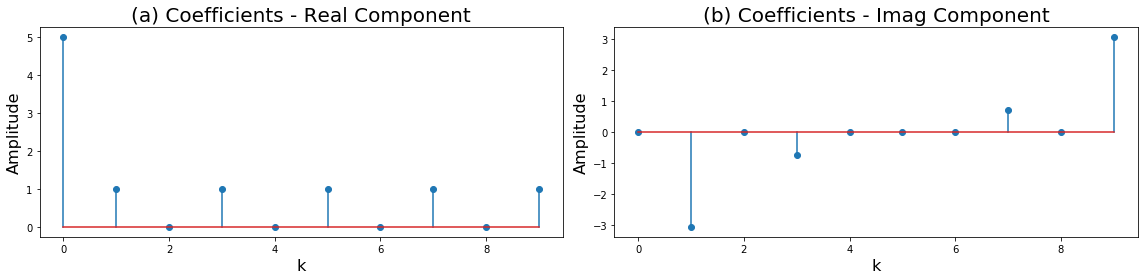

In [14]:
# . . Example with N=10 and n0=5
N,n0=10,5
x3d = np.ones(N); x3d[n0:N]=0
X3d = np.fft.fft(x3d);print(X3d)

plt.figure(figsize=(16, 4))
plt.subplot(121);plt.stem(X3d.real);label('(a) Coefficients - Real Component')
plt.subplot(122);plt.stem(X3d.imag);label('(b) Coefficients - Imag Component')
plt.tight_layout(); plt.show()

**Figure 6. The real (a) and imaginary (b) coefficients of the discrete Fourier series in equation 47 for the choice of $N=10$ and $n_0=5$.**


## Example 4

**Q:** Find the inverse DFT of the $N=10$ point signal

$$X[k] = 
\left\{
\begin{array}{cc}
3, & k=0\\
1, & 1\le k \le 9\\
\end{array}
\right.
\tag{49}
$$

**A:** To find the inverse DFT, we note that $X[k]$ may exploit the linearity property of the DFT and write:

$$X[k] = X_1[k]+X_2[k] = 1+2\delta[k] \tag{50}$$

From the example above we know that 

$$\delta[n] \overset{DFT}{\Longleftrightarrow} 1 \tag{51}$$

and

$$1\overset{DFT}{\Longleftrightarrow} N\delta[k].  \tag{52}$$

Thus, 

$$\delta[n]+\frac{1}{5} \overset{DFT}{\Longleftrightarrow} 1+2\delta[k]. \tag{53}$$

The coefficients and stem plots of the real and imaginary components are shown below.

[1.2+0.j 0.2+0.j 0.2+0.j 0.2+0.j 0.2+0.j 0.2+0.j 0.2+0.j 0.2+0.j 0.2+0.j
 0.2+0.j]


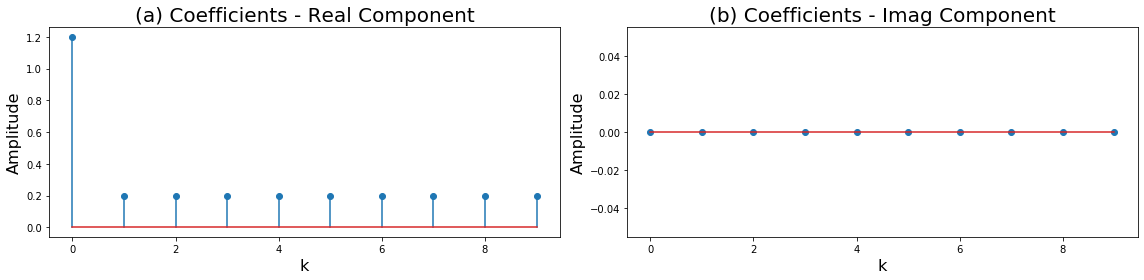

In [15]:
x2=np.array([3,1,1,1,1,1,1,1,1,1])
X2 = np.fft.ifft(x2);print(X2)

plt.figure(figsize=(16, 4))
plt.subplot(121);plt.stem(X2.real);label('(a) Coefficients - Real Component')
plt.subplot(122);plt.stem(X2.imag);label('(b) Coefficients - Imag Component')
plt.tight_layout(); plt.show()

**Figure 7. The real (a) and imaginary (b) coefficients of the discrete Fourier series in equation 53.**

## Example 5

**Q:** Find the N-point DFT of:

$$x[n] = 4+\mathrm{cos}^2\left(\frac{2\pi n}{N}\right), \quad n=0,N-1. \tag{54}$$

**A:** The DFT of this sequence may be evaluated by expanding cosine as a sum of complex exponentials:

$$x[n] = 4 + \left( 
\frac{e^{i2\pi n/N} + e^{-i2\pi n/N}}{2}
\right)^2 
=
4 + \frac{1}{4}\left(
e^{i4\pi n/N} + 2 + e^{-i4\pi n/N}
\right)
=
\frac{9}{2} + \frac{1}{4} e^{i4\pi n/N} + \frac{1}{4} e^{-i4\pi n/N}
\tag{55}
$$

Using the periocity we rewrite the last term as:

$$x[n] =\frac{9}{2} + \frac{1}{4} e^{\frac{i2\pi}{N} (2n)} + \frac{1}{4} e^{\frac{-i2\pi}{N} (N-2)n}
\tag{56}
$$

Thus, writing

$$ X[k] = \sum_{n=0}^{N-1} \left( \frac{9}{2} + \frac{1}{4} e^{\frac{i2\pi}{N} (2n)} + \frac{1}{4} e^{\frac{-i2\pi}{N} (N-2)n}\right) e^{-\frac{i2\pi k}{N} n},\quad 0\le k < N.
\tag{57}
$$

Expressing these as three sums:

$$ X[k] = 
\frac{9}{2} 
\sum_{n=0}^{N-1} 
e^{-\frac{i2\pi k}{N} n} 
+ 
\frac{1}{4} \sum_{n=0}^{N-1} 
e^{\frac{i2\pi}{N} (2n)} e^{-\frac{i2\pi k}{N} n} 
+ 
\frac{1}{4}\sum_{n=0}^{N-1} 
 e^{\frac{-i2\pi}{N} (N-2)n} e^{-\frac{i2\pi k}{N} n}
,\quad 0\le k < N.
\tag{58}
$$

Combining the exponential terms yields:

$$ X[k] = 
\frac{9}{2} 
\sum_{n=0}^{N-1} 
e^{-\frac{i2\pi k}{N} n} 
+ 
\frac{1}{4} \sum_{n=0}^{N-1} 
e^{\frac{i2\pi n(k-2)}{N} n} 
+ 
\frac{1}{4}\sum_{n=0}^{N-1} 
 e^{\frac{-i2\pi}{N} (N-2-k)n}
,\quad 0\le k < N.
\tag{59}
$$
or evaluating for different $k$ values:

$$ X[k] = \left\{
\begin{array}{cc}
\frac{9N}{2}, & k=0\\
\frac{N}{4}, & k=2, N-2\\
0 , & \mathrm{otherwise}\\
\end{array}
\right.
\tag{60}
$$

The coefficient and stem plots of the real and imaginary components are shown below:

[4.50000000e+01+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
 2.50000000e+00-1.04411635e-15j 0.00000000e+00+0.00000000e+00j
 3.44338698e-15+1.68941575e-15j 0.00000000e+00+0.00000000e+00j
 3.44338698e-15-1.68941575e-15j 0.00000000e+00-0.00000000e+00j
 2.50000000e+00+1.04411635e-15j 0.00000000e+00-0.00000000e+00j]


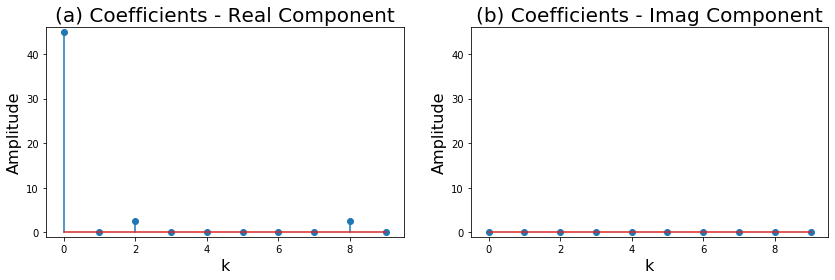

In [16]:
# . . Example with N=10
n=np.array(np.arange(0,N,1))
x4 = 4+np.cos(2*np.pi*n/N)**2
X4 = np.fft.fft(x4);print(X4)
 
plt.figure(figsize=(12, 4))
plt.subplot(121);plt.stem(X4.real);label('(a) Coefficients - Real Component');plt.axis([-0.5,N-0.5,-1,9*N/2+1])
plt.subplot(122);plt.stem(X4.imag);label('(b) Coefficients - Imag Component');plt.axis([-0.5,N-0.5,-1,9*N/2+1])
plt.tight_layout(); plt.show()

**Figure 8. The real (a) and imaginary (b) coefficients of the discrete Fourier series in equation 60.**


In [11]:
xn = [0,0,-1,0]
print(np.fft.ifft(xn))

[-0.25+0.j  0.25+0.j -0.25+0.j  0.25+0.j]


## Matrix Representation of the DFT

Recall from above that we can represent the DFS as a matrix operation.  Due to the similarity between the DFS and DFT operations, the same can be said for the DFT:

$$
\left(
\begin{array}{c}
\tilde{X}[0] \\
\tilde{X}[1]\\
\tilde{X}[2]\\
\dots \\
\tilde{X}[N-3]\\
\tilde{X}[N-2]\\
\tilde{X}[N-1]\\
\end{array}
\right)
=
\left(
\begin{array}{c}
W_N^{0*0} & W_N^{1*0} & W_N^{2*0} & \vdots & W_N^{(N-3)*0} & W_N^{(N-2)*0} & W_N^{(N-1)*0} \\
W_N^{0*1} & W_N^{1*1} & W_N^{2*1} & \vdots & W_N^{(N-3)*1} & W_N^{(N-2)*1} & W_N^{(N-1)*1} \\
W_N^{0*2} & W_N^{1*2} & W_N^{2*2} & \vdots & W_N^{(N-3)*2} & W_N^{(N-2)*2} & W_N^{(N-1)*2} \\
\dots     & \dots     & \dots     & \vdots  & \dots     & \dots     & \dots     \\
W_N^{0*(N-3)} & W_N^{1*(N-3)} & W_N^{2*(N-3)} & \vdots & W_N^{(N-3)*(N-3)} & W_N^{(N-2)*(N-3)} & W_N^{(N-1)*(N-3)} \\
W_N^{0*(N-2)} & W_N^{1*(N-2)} & W_N^{2*(N-2)} & \vdots & W_N^{(N-3)*(N-2)} & W_N^{(N-2)*(N-2)} & W_N^{(N-1)*(N-2)} \\
W_N^{0*(N-1)} & W_N^{1*(N-1)} & W_N^{2*(N-1)} & \vdots & W_N^{(N-3)*(N-1)} & W_N^{(N-2)*(N-1)} & W_N^{(N-1)*(N-1)} \\
\end{array}
\right)
\left(
\begin{array}{c}
\tilde{x}[0] \\
\tilde{x}[1] \\
\tilde{x}[2] \\
\dots \\
\tilde{x}[N-3] \\
\tilde{x}[N-2] \\
\tilde{x}[N-1] \\
\end{array}
\right) 
\tag{61}
$$

# Properties of the DFT

Here I list some of the important properties of the DFT.  Because each sequence is assumed to be finite in length, one must be careful manipulating DFTs to avoid unintended behaviour (e.g., aliasing).

## Linearity

If $x_1[n]$ and $x_2[n]$ have N-point DFTs $X_1[k]$ and $X_2[k]$, respectively, then 

$$ax_1[n]+bx_2[n] \overset{DFT}{\Longleftrightarrow}aX_1[k]+bX_2[k] \tag{62}$$

NOTE: When using this property it is important to ensure that the DFTs are the same length.  If there are unequal than the shorter sequence must be **padded** with zeros to make it the same length as the longer one. 

## Symmetry

If $x[n]$ is real valued then $X[k]$ is conjugate symmetric

$$X[k] = \overline{X[-k]} \tag{63}$$


## Linear Convolution using the DFT

The DFT provides a convenient way to perform convolutions without having to evaluate the convolution sum.  If $h[n]$ is N_1 points long and $x[n]$ is N_2 points longs, then $h[n]$ may be linearly convolved with $x[n]$ according to the following formula:

1. Pad the sequences $h[n]$ and $x[n]$ with zeros so that they are both of length $N\ge N_1+N_2-1$.
2. Find the $N$-point DFTs of $h[n]$ and $x[n]$.
3. Multiply the DFTS to form the product $Y[k] = H[k] X[k]$.
4. Find the inverse DFT of $Y[k]$.

In [39]:
# Let's time as well
import time
import scipy as sci

# . . function to run DFT
def run_DFT(N1,N2):
    n = np.array(np.arange(0,N1,1))
    xn = np.exp(-n)
    hn = np.zeros(N2); hn[0]=1; hn[int(N2/2)]=-1

    # . . Begin time
    t0 = time.time()

    # . . Step 1 - Pad sequences
    xnpad = np.zeros(N1+N2-1); xnpad[0:N1]=xn;
    hnpad = np.zeros(N1+N2-1); hnpad[0:N2]=hn;

    # . . Step 2 - Take DFTs of both
    Xnpad = np.fft.fft(xnpad);
    Hnpad = np.fft.fft(hnpad);

    # . . Step 3 - Multiply
    Ynpad = Xnpad*Hnpad;

    # . . Step 4 - Take ifft of result
    ynpad = np.fft.ifft(Ynpad)

    # . . End time
    t1 = time.time()
    return t0,t1

# . . Function to run Convolution
def run_conv(N1,N2):
    n = np.array(np.arange(0,N1,1))
    xn = np.exp(-n)
    hn = np.zeros(N2); hn[0]=1; hn[int(N2/2)]=-1
    t0 = time.time()
    conv = np.convolve(xn,hn,mode="full")
    t1 = time.time()
    return t0,t1

def run_scipy_conv(N1,N2):
    n = np.array(np.arange(0,N1,1))
    xn = np.exp(-n)
    hn = np.zeros(N2); hn[0]=1; hn[int(N2/2)]=-1
    t0 = time.time()
    conv = sci.signal.fftconvolve(xn,hn,mode="same")
    t1 = time.time()
    return t0,t1

## . . Main code here
Nmin,Nmax=1,8192
ratio     = np.zeros(Nmax-Nmin+1)
ratio2    = np.zeros(Nmax-Nmin+1)
DFT_time  = np.zeros(Nmax-Nmin+1)
CONV_time = np.zeros(Nmax-Nmin+1)
SDFT_time = np.zeros(Nmax-Nmin+1)

# . . Let's loop over different lengths of vectors
for ix in range(Nmin,Nmax,1):
    t0,t1=run_DFT(ix,ix)
    DFT_time[ix] = t1-t0

    t0,t1=run_conv(ix,ix)
    CONV_time[ix] = t1-t0

    t0,t1=run_scipy_conv(ix,ix)
    SDFT_time[ix] = t1-t0    
    
    ratio [ix]=CONV_time[ix]/(DFT_time[ix]+.00000001)
    ratio2[ix]=CONV_time[ix]/(SDFT_time[ix]+.00000001)

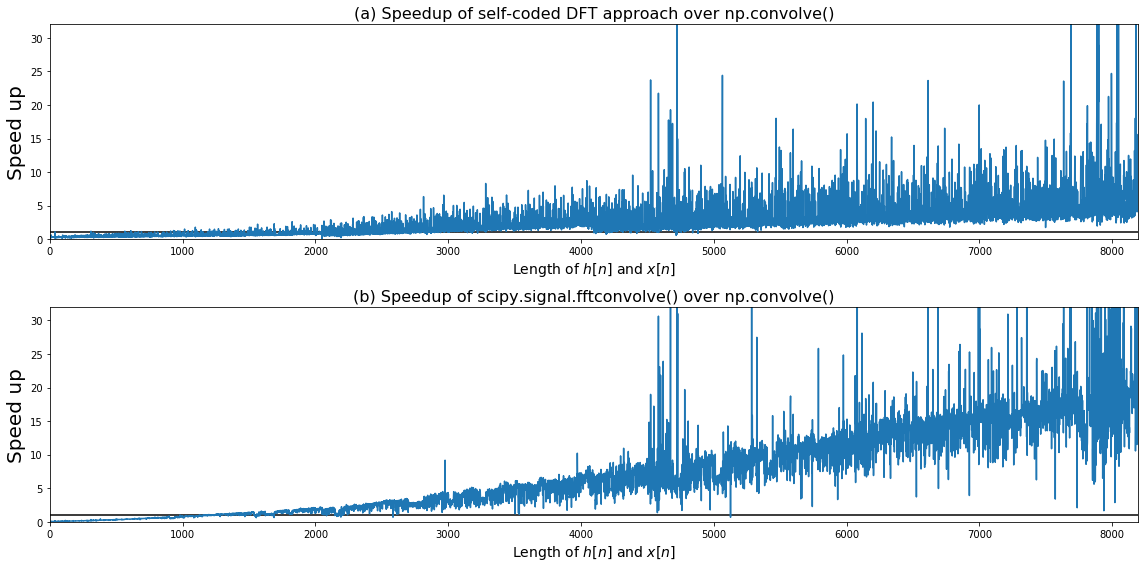

In [50]:
# . . There's a NaN for a small number .. fix this
ratio=np.nan_to_num(ratio)

# Plotting
plt.figure(figsize=(16, 8))
plt.subplot(211)
plt.plot([0,8192],[1,1],'k')
plt.plot(range(Nmin,Nmax+1,1),ratio)
plt.xlabel('Length of $h[n]$ and $x[n]$',size=14)
plt.ylabel('Speed up',size=20)
plt.title('(a) Speedup of self-coded DFT approach over np.convolve()',size=16)
plt.xlim(0,8192)
plt.ylim(0,32)

plt.subplot(212)
plt.plot([0,8192],[1,1],'k')
plt.plot(range(Nmin,Nmax+1,1),ratio2)
plt.xlabel('Length of $h[n]$ and $x[n]$',size=14)
plt.ylabel('Speed up',size=20)
plt.title('(b) Speedup of scipy.signal.fftconvolve() over np.convolve()',size=16)
plt.xlim(0,8192)
plt.ylim(0,32)

plt.tight_layout(); plt.show()

**Figure 9. Speed up of the DFT approach over applying time-domain convolution of $h[n] \ast x[n]$ for array sizes of $[0,2048]$. (a) The speed up of the DFT over the np.convolve() approach for full range. (b) The speed up of the scipy.signal.fftconvolve() over the np.convolve() approach for full range.**

## Fast Fourier Transforms (FFTs)

Maybe it is surprising to you how non-uniform the results actually. This is partially because of something we've only briefly talked about: the [fast Fourier Transform (FFT)](https://en.wikipedia.org/wiki/Fast_Fourier_transform).  When the length of the arrays can be factorized by powers of 2,3,5,7 or 11, a FFT algorithm can be used to split up the full DFT into a number of sub-FFTs that are smaller and more efficient to compute.  If the resulting dimensions is again divisible by a power of 2,3,5,7 and 11, then it can be again split. 

For a series of of $2^N$ where $N$ is an integers, it is possible to perform $N-1$ subdivisions, compute a 2-point DFT, and the recombine the results back up the chain to generate the full $2^N$ FFT.  The order of operations of this is $\mathcal{O}(N log_2 N)$, while the DFT is $\mathcal{O}(N^2)$.  Thus, it makes sense to pad a few zeros to a length that is optimal for FFT!